In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy

In [11]:
def vocabulary_size(data, column="Cognate_Set"):
    """Count different words in vocabulary."""
    return len(set(data[column]))

In [12]:
def semantic_width(data, column="Cognate_Set"):
    """Calculate average synonym count.

    Calculate the average weighted semantic width in the language
    represented by data.

    """
    width = 0
    m = 0
    for form, meanings in data.groupby(column):
        width += meanings["Weight"].sum()**2/(meanings["Weight"]**2).sum()
        m += 1
    return width/m

In [13]:
def synonymity(data):
    """Calculate average synonym count.

    Calculate the average weighted synonym count in the language
    represented by data.

    """
    return semantic_width(data, column="Feature_ID")

In [14]:
try:
    clics_words = pandas.read_csv("words.csv")
except FileNotFoundError:
    import urllib.request
    data = urllib.request.urlopen(
        "https://github.com/clics/clics-data/blob/master/data/words.csv?raw=true")
    clics_words = pandas.read_csv(data)

clics_words["Weight"] = 1

clics_vocabulary = []
clics_semantic_width = []
clics_synonymity = []
for language, words in clics_words.groupby("LanguageId"):
    clics_vocabulary.append(vocabulary_size(words, "ClicsValue"))
    clics_semantic_width.append(semantic_width(words, "ClicsValue"))
    clics_synonymity.append(semantic_width(words, "ConcepticonGloss"))

In [23]:
path = "../evenmorerobustness/"

def condition(file):
    x = file.startswith("trivial_long") and file.endswith(".tsv")
    x &= ("_ipoisson100" in file or "_id199" in file or "_i100" in file) 
    #x &= "_id10" in file
    x &= "_n" not in file
    x &= "_c" not in file or "_cdegree_squared" in file
    return x

trivial_long_branch_03_id199.tsv
trivial_long_branch_3_ipoisson100.tsv
trivial_long_branch_3_id199.tsv
trivial_long_branch_3_i100.tsv
trivial_long_branch_84_i100.tsv
trivial_long_branch_4_i100.tsv
trivial_long_branch_14_i100.tsv
trivial_long_branch_06_i100.tsv
trivial_long_branch_800_id199.tsv
trivial_long_branch_801_id199.tsv
trivial_long_branch_802_id199.tsv
trivial_long_branch_804_id199.tsv
trivial_long_branch_805_id199.tsv
trivial_long_branch_80_i100.tsv
trivial_long_branch_80_id199_cdegree_squared.tsv
trivial_long_branch_80_id199.tsv
trivial_long_branch_80_ipoisson100.tsv
trivial_long_branch_81_i100.tsv
trivial_long_branch_81_id199_cdegree_squared.tsv
trivial_long_branch_81_id199.tsv
trivial_long_branch_81_ipoisson100.tsv
trivial_long_branch_82_i100.tsv
trivial_long_branch_82_id199.tsv
trivial_long_branch_82_ipoisson100.tsv
trivial_long_branch_84_id199.tsv
trivial_long_branch_3_id199_cdegree_squared.tsv
trivial_long_branch_04_id199.tsv
trivial_long_branch_4_ipoisson100.tsv
trivial

/usr/lib/python3/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Clics: nan±nan
Simulation: 1246.0±27.1


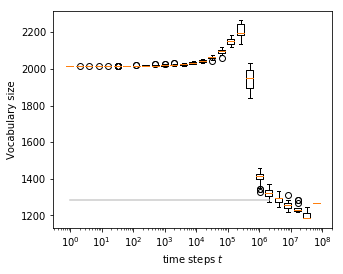

In [24]:
import os
n = {}
for file in os.listdir(path):
    if condition(file):
        print(file)
        all_data = pandas.read_csv(
            os.path.join(path, file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        for language_id, language_data in all_data.groupby("Language_ID"):
            n.setdefault(int(language_id), []).append(vocabulary_size(language_data))

plt.boxplot(list(n.values()), positions=list(n.keys()), widths=[i/2 for i in n.keys()], manage_xticks=False)

plt.plot([1, 2*1048576], [1284, 1284], '0.8', label="Root #Words")

plt.xlabel("time steps $t$")
plt.gca().set_xscale('log')
plt.ylabel("Vocabulary size")
print("Clics: {:0.1f}±{:0.1f}".format(
    numpy.mean(clics_vocabulary), numpy.std(clics_vocabulary)))
stable = numpy.array(sum([n[2**i] for i in range(23, 27)], []))
print("Simulation: {:0.1f}±{:0.1f}".format(stable.mean(), stable.std()))
plt.gcf().set_size_inches(5,4)
plt.savefig("vocabularysize_timesteps.pdf")


In [17]:
n[16777216]

[1228,
 1286,
 1284,
 1243,
 1220,
 1224,
 1230,
 1231,
 1270,
 1240,
 1224,
 1220,
 1228,
 1230]

trivial_long_branch_03_id199.tsv


/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2558: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


trivial_long_branch_3_ipoisson100.tsv
trivial_long_branch_3_id199.tsv
trivial_long_branch_3_i100.tsv
trivial_long_branch_84_i100.tsv
trivial_long_branch_4_i100.tsv
trivial_long_branch_14_i100.tsv
trivial_long_branch_06_i100.tsv
trivial_long_branch_800_id199.tsv
trivial_long_branch_801_id199.tsv
trivial_long_branch_802_id199.tsv
trivial_long_branch_804_id199.tsv
trivial_long_branch_805_id199.tsv
trivial_long_branch_80_i100.tsv
trivial_long_branch_80_id199_cdegree_squared.tsv
trivial_long_branch_80_id199.tsv
trivial_long_branch_80_ipoisson100.tsv
trivial_long_branch_81_i100.tsv
trivial_long_branch_81_id199_cdegree_squared.tsv
trivial_long_branch_81_id199.tsv
trivial_long_branch_81_ipoisson100.tsv
trivial_long_branch_82_i100.tsv
trivial_long_branch_82_id199.tsv
trivial_long_branch_82_ipoisson100.tsv
trivial_long_branch_84_id199.tsv
trivial_long_branch_3_id199_cdegree_squared.tsv
trivial_long_branch_04_id199.tsv
trivial_long_branch_4_ipoisson100.tsv
trivial_long_branch_4_id199.tsv
trivial_

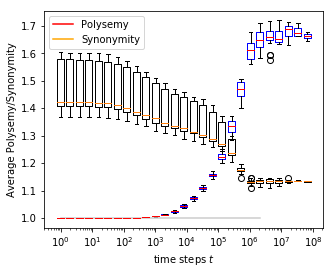

In [37]:
import os
n = {}
c = {}
p = {}
for file in os.listdir(path):
    if condition(file):
        all_data = pandas.read_csv(
            os.path.join(path, file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        print(file)
        for language_id, language_data in all_data.groupby("Language_ID"):
            n.setdefault(int(language_id), []).append(synonymity(language_data))
            
            sum_width = 0
            m = 0
            accs, widths = [], []
            for form, meanings in language_data.groupby("Cognate_Set"):
                width = meanings["Weight"].sum()**2/(meanings["Weight"]**2).sum()
                accs.append(meanings["Weight"].sum())
                widths.append(width)
                sum_width += width
                m += 1
            c.setdefault(int(language_id), []).append(numpy.corrcoef(accs, widths)[1, 0])
            p.setdefault(int(language_id), []).append(sum_width/m)

plt.boxplot(list(n.values()), positions=list(n.keys()), widths=[i/2 for i in n.keys()], manage_xticks=False)
plt.boxplot(list(p.values()), positions=list(p.keys()), widths=[i/2 for i in p.keys()], manage_xticks=False,
               boxprops=dict(color='blue'), medianprops=dict(color='red'))

plt.plot([1, 2*1048576], [1, 1], '0.8')

plt.plot([0,0],[1,1],c='red',label="Polysemy")
plt.plot([0,0],[1,1],c='orange',label="Synonymity")
plt.xlabel("time steps $t$")
plt.gca().set_xscale('log')
plt.ylabel("Average Polysemy/Synonymity")
plt.legend()
print("Synonymity")
#print("Clics: {:0.1f}±{:0.1f}".format(
#    numpy.mean(clics_synonymity), numpy.std(clics_synonymity)))
stable = numpy.array([n[2**i] for i in range(20, 22)])
# print("Simulation: {:0.1f}±{:0.1f}".format(stable.mean(), stable.std()))
print("Polysemy")
# print("Clics: {:0.1f}±{:0.1f}".format(
#    numpy.mean(clics_semantic_width), numpy.std(clics_semantic_width)))
stable = numpy.array([p[2**i] for i in range(20, 22)])
#print("Simulation: {:0.1f}±{:0.1f}".format(stable.mean(), stable.std()))
plt.gcf().set_size_inches(5,4)
plt.savefig("synonymitypolysemy_timesteps.pdf")


/usr/lib/python3/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)
/vol/home/kaipingga/.local/lib/python3.5/site-packages/matplotlib/cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/vol/home/kaipingga/.local/lib/python3.5/site-packages/matplotlib/cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/vol/home/kaipingga/.local/lib/python3.5/site-packages/matplotlib/cbook.py:2081: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/vol/home/kaipingga/.local/lib/python3.5/site-packages/matplotlib/cbook.py:2082: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)
/vol/home/kaipingga/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.

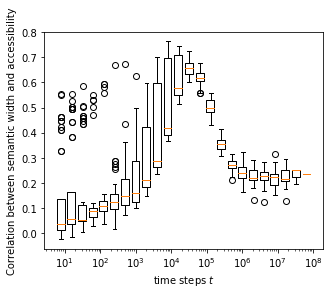

In [34]:
plt.boxplot(list(c.values()), positions=list(c.keys()), widths=[i/2 for i in c.keys()], manage_xticks=False)

plt.xlabel("time steps $t$")
plt.gca().set_xscale('log')
plt.ylabel("Correlation between semantic width and accessibility")
plt.legend()

plt.gcf().set_size_inches(5,4)
plt.savefig("correlation_timesteps.pdf")
